# Analyzing Relationship Between Hashtags and Likes on Instagram

### Welcome!
In this project I decided to make my own webscraping program that extracted data from instagram.com from any given public account. I happened to use my brothers instagram, which had a lot of posts and hashtags for each post. Then using that data, I analyzed it hear on Jupyter Book to see what are the most effective hashtags. 


### How it works
To start, you plug the account url into the web scraping program that I developed. Then it goes through the entire page scrolling down getting the link of every single photo posted. All these links are stored in a list. Then it goes to each link and finds:
1. Amount of likes
2. Date
3. Hashtags

That was the tedious part of the project, the next step was to clean the data and analyze it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn



df = pd.read_csv('B3data.csv')
df

,Unnamed: 0,Date,Link,Tags,Likes
0,0,2020-01-21T03:51:44.000Z,https://www.instagram.com/p/B7kThVKHsb6/,"['musicvideo', 'music', 'hiphop', 'video', 'mu...",54
1,1,2020-01-18T14:10:36.000Z,https://www.instagram.com/p/B7dr9eInUfc/,"['undergroundrap', 'hiphop', 'undergroundhipho...",49
2,2,2020-01-09T22:22:11.000Z,https://www.instagram.com/p/B7HZEArnl__/,"['beats', 'music', 'hiphop', 'producer', 'bost...",61
3,3,2020-01-01T06:41:56.000Z,https://www.instagram.com/p/B6xHGbjFbmJ/,"['boston', 'massachusetts', 'newyork', 'neweng...",46
4,4,2019-12-21T18:06:42.000Z,https://www.instagram.com/p/B6WAuKUnW_m/,"['boston', 'massachusetts', 'newengland', 'new...",43
...,...,...,...,...,...
138,139,2018-08-04T19:51:10.000Z,https://www.instagram.com/p/BmEcCWQhjFX/,"['peakmountain', 'peakmoments', 'whitemountain...",33
139,140,2018-06-29T03:52:25.000Z,https://www.instagram.com/p/BkmBH2Il4u0/,"['rap', 'corruptyouth', 'cy', 'clusterfest', '...",33
140,141,2018-05-30T00:10:04.000Z,https://www.instagram.com/p/BjYYZ5XgXDX/,"['SOL', 'realrap', 'hiphopdance', 'rapmonster'...",34
141,142,2018-05-14T03:16:24.000Z,https://www.instagram.com/p/Bivgl2mA4ZZ/,"['goofygirls', 'happybirthday', 'kimkardashian...",34


## Converting to Datetime

In [2]:
df['Date'] = df['Date'].map(lambda x: x[:10])
df['Date']= pd.to_datetime(df['Date']) 
df

,Unnamed: 0,Date,Link,Tags,Likes
0,0,2020-01-21,https://www.instagram.com/p/B7kThVKHsb6/,"['musicvideo', 'music', 'hiphop', 'video', 'mu...",54
1,1,2020-01-18,https://www.instagram.com/p/B7dr9eInUfc/,"['undergroundrap', 'hiphop', 'undergroundhipho...",49
2,2,2020-01-09,https://www.instagram.com/p/B7HZEArnl__/,"['beats', 'music', 'hiphop', 'producer', 'bost...",61
3,3,2020-01-01,https://www.instagram.com/p/B6xHGbjFbmJ/,"['boston', 'massachusetts', 'newyork', 'neweng...",46
4,4,2019-12-21,https://www.instagram.com/p/B6WAuKUnW_m/,"['boston', 'massachusetts', 'newengland', 'new...",43
...,...,...,...,...,...
138,139,2018-08-04,https://www.instagram.com/p/BmEcCWQhjFX/,"['peakmountain', 'peakmoments', 'whitemountain...",33
139,140,2018-06-29,https://www.instagram.com/p/BkmBH2Il4u0/,"['rap', 'corruptyouth', 'cy', 'clusterfest', '...",33
140,141,2018-05-30,https://www.instagram.com/p/BjYYZ5XgXDX/,"['SOL', 'realrap', 'hiphopdance', 'rapmonster'...",34
141,142,2018-05-14,https://www.instagram.com/p/Bivgl2mA4ZZ/,"['goofygirls', 'happybirthday', 'kimkardashian...",34


## Convert Likes to Integers/ScatterPlot of Likes Relative to Date

It pretty interesting because it appears that my brothers instagram has a peak for likes in 2019. I wonder why that is?

C:\Users\noahs\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


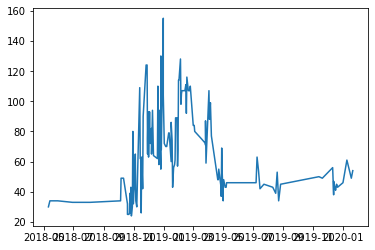

In [3]:
df['Likes'] = df['Likes'].map(lambda x: int(x))
plt.plot(df.Date, df.Likes)

## Finding Unique Hashtags

In [4]:

df['Tags'] = df['Tags'].map(lambda x: x.rstrip(']').lstrip('[').replace("'",""))
allTags = []
for x in df.Tags:
    tags = x.split(',')
 
    for i in tags:
        i = i.replace("'", "")
        if i not in allTags:
            allTags.append(i)
print(allTags)

['musicvideo', ' music', ' hiphop', ' video', ' musician', ' rap', ' love', ' newmusic', ' song', ' musically', ' singer', ' artist', ' youtube', ' musicproducer', ' rapper', ' instagram', ' musica', ' musicians', ' like', ' instagood', ' cover', ' follow', ' musicvideos', ' instamusic', ' art', ' producer', ' spotify', ' musicislife', ' viral', ' bhfyp', 'undergroundrap', ' undergroundhiphop', ' underground', ' trap', ' hiphopmusic', ' undergroundmusic', ' soundcloud', ' unsignedartist', ' hiphopculture', ' beats', ' rapmusic', ' upcomingrapper', ' soundcloudrapper', ' undergroundartist', ' upcomingartist', ' hiphophead', ' hiphopartist', ' trapmusic', ' unsignedrapper', ' boombap', ' horrorcore', ' unsignedhype', ' realrap', 'beats', ' bostonrap', ' beatmaker', ' beat', ' flstudio', ' NYCdj', ' instrumental', ' beatsforsale', ' studio', ' typebeat', ' instrumentals', ' trapbeats', ' rappers', ' rnb', ' typebeats', ' musicproduction', 'boston', ' massachusetts', ' newyork', ' newengla

## Creating a DataFrame with Columns of Word, AvgLikes, Occurences

In [5]:

likesIndex = []
hashDF = pd.DataFrame(columns = ['Word', 'AvgLikes', 'Occurences'])
for i in allTags:
    likesIndex = []
    for x in range(len(df.Tags)):
        if i in df.Tags[x]:
            likesIndex.append(x)
    print(i,df.Likes[likesIndex].mean(), 'Occurences: ', len(likesIndex))
    hashDF = hashDF.append({'Word': i, 'AvgLikes':df.Likes[likesIndex].mean(), 'Occurences': len(likesIndex)},ignore_index=True)
        

musicvideo 71.85365853658537 Occurences:  41
 music 71.69444444444444 Occurences:  72
 hiphop 64.52 Occurences:  50
 video 77.42424242424242 Occurences:  33
 musician 73.08333333333333 Occurences:  24
 rap 70.57142857142857 Occurences:  56
 love 56.62162162162162 Occurences:  37
 newmusic 57.333333333333336 Occurences:  27
 song 76.875 Occurences:  32
 musically 53.666666666666664 Occurences:  12
 singer 66.92857142857143 Occurences:  14
 artist 64.0 Occurences:  34
 youtube 72.89285714285714 Occurences:  28
 musicproducer 57.4 Occurences:  20
 rapper 70.41463414634147 Occurences:  41
 instagram 61.645161290322584 Occurences:  31
 musica 72.05263157894737 Occurences:  19
 musicians 64.33333333333333 Occurences:  15
 like 67.35849056603773 Occurences:  53
 instagood 57.02857142857143 Occurences:  35
 cover 51.666666666666664 Occurences:  3
 follow 69.70212765957447 Occurences:  47
 musicvideos 44.0 Occurences:  6
 instamusic 69.22222222222223 Occurences:  18
 art 61.18181818181818 Occur

foodphotography 48.0 Occurences:  1
 foodie 48.0 Occurences:  1
 instafood 48.0 Occurences:  1
 foodstagram 48.0 Occurences:  1
 foodblogger 48.0 Occurences:  1
 foodgasm 48.0 Occurences:  1
 foodlover 48.0 Occurences:  1
 yummy 48.0 Occurences:  1
 delicious 48.0 Occurences:  1
 foodies 48.0 Occurences:  1
 healthyfood 48.0 Occurences:  1
 foodpics 48.0 Occurences:  1
 foods 48.0 Occurences:  1
 tasty 48.0 Occurences:  1
 dinner 48.0 Occurences:  1
 homemade 48.0 Occurences:  1
 foodpic 48.0 Occurences:  1
 eat 48.0 Occurences:  1
 breakfast 48.0 Occurences:  1
 yum 48.0 Occurences:  1
 lunch 48.0 Occurences:  1
 foodblog 48.0 Occurences:  1
 foodgram 48.0 Occurences:  1
videography 78.5 Occurences:  2
 videographer 95.66666666666667 Occurences:  6
 cinematography 75.0 Occurences:  5
 filmmaker 87.2 Occurences:  5
 filmmaking 80.0 Occurences:  4
 corsair570x 77.0 Occurences:  1
 videooftheday 78.0 Occurences:  2
 videoshoot 77.0 Occurences:  1
 corsair 77.0 Occurences:  1
 videoproduc

 movies 58.666666666666664 Occurences:  3
 cinema 80.0 Occurences:  6
 videooninstagram 105.0 Occurences:  1
 videodiary 105.0 Occurences:  1
 instav 92.0 Occurences:  2
 films 85.0 Occurences:  4
 iphonesia 105.0 Occurences:  1
 actress 74.0 Occurences:  2
 videogames 105.0 Occurences:  1
 videogame 105.0 Occurences:  1
 behindthescenes 105.0 Occurences:  1
 actor 79.0 Occurences:  3
 hollywood 68.66666666666667 Occurences:  3
follow 70.96153846153847 Occurences:  52
 musiclife 98.0 Occurences:  1
dope 100.16666666666667 Occurences:  6
 streetstyle 96.0 Occurences:  2
 eastside 128.0 Occurences:  1
 lyricist 128.0 Occurences:  1
 nycmusicvideos 128.0 Occurences:  1
 clothingline 128.0 Occurences:  1
 throwie 128.0 Occurences:  1
 graff 69.0 Occurences:  5
 streetwear 128.0 Occurences:  1
 B3 128.0 Occurences:  1
 jeanius3 114.0 Occurences:  1
 radiopushers 114.0 Occurences:  1
 betonyourself 114.0 Occurences:  1
 remix 85.0 Occurences:  2
 partymusic 85.0 Occurences:  2
 dancehall 85.

 soundcloudartist 93.5 Occurences:  2
 worldwide 93.5 Occurences:  2
 soundcloudpromotion 93.5 Occurences:  2
 weed 93.5 Occurences:  2
 vibe 76.75 Occurences:  4
 musicpromotions 93.5 Occurences:  2
 houstonvseverybody 93.5 Occurences:  2
 houstontx 93.5 Occurences:  2
 bet 100.33333333333333 Occurences:  3
 mtv 103.66666666666667 Occurences:  3
 dopeartist 93.5 Occurences:  2
 musicblogs 93.5 Occurences:  2
 noisy 93.5 Occurences:  2
 hiphopweekly 93.5 Occurences:  2
clouds 58.2 Occurences:  5
 holiday 65.0 Occurences:  1
 look 65.0 Occurences:  1
 lake 65.0 Occurences:  1
 hike 65.0 Occurences:  1
 snowfall 65.0 Occurences:  1
 alpes 65.0 Occurences:  1
 glacier 65.0 Occurences:  1
 animal 65.0 Occurences:  1
 crazy 65.0 Occurences:  1
 roadtrip 65.0 Occurences:  1
 winterstyle 65.0 Occurences:  1
 chic 57.333333333333336 Occurences:  3
purrfectfelines 82.0 Occurences:  1
 instacat 82.0 Occurences:  1
 of 72.0 Occurences:  2
 instagramcats 82.0 Occurences:  1
 coicommunity 82.0 Occu

 skydiving 109.0 Occurences:  1
 parachute 109.0 Occurences:  1
 skydive 109.0 Occurences:  1
 motocross 109.0 Occurences:  1
 bmx 109.0 Occurences:  1
 flying 109.0 Occurences:  1
 skate 85.5 Occurences:  2
 wakeboarding 109.0 Occurences:  1
 surfer 109.0 Occurences:  1
 extremesport 85.5 Occurences:  2
 watersports 109.0 Occurences:  1
 climbing 109.0 Occurences:  1
 jump 109.0 Occurences:  1
 paragliding 109.0 Occurences:  1
 redbull 109.0 Occurences:  1
LandscapeLovers 41.0 Occurences:  1
 BeautifulLandscape 41.0 Occurences:  1
 Viewpoint 41.0 Occurences:  1
 NakedPlanet 41.0 Occurences:  1
 LandscapeHunter 41.0 Occurences:  1
 Sky_Captures 41.0 Occurences:  1
 ScenicView 41.0 Occurences:  1
 Cloudscape 41.0 Occurences:  1
 SkyScape 41.0 Occurences:  1
 Mountains 41.0 Occurences:  1
 LandscapeShot 41.0 Occurences:  1
 Landscape_Specialist 41.0 Occurences:  1
 Splendid_Earth 41.0 Occurences:  1
 Outdoors 41.0 Occurences:  1
 Earthpix 41.0 Occurences:  1
 DiscoverLandscape 41.0 Occur

 slo 56.0 Occurences:  3
 gettinthereslowly 43.666666666666664 Occurences:  3
 grindisreal 43.666666666666664 Occurences:  3
 mavicpro2 49.0 Occurences:  1
 djimavicpro2 49.0 Occurences:  1
 djimavicair 49.0 Occurences:  1
 djironins 49.0 Occurences:  1
 lumixgh5 49.0 Occurences:  3
 clusterfest 41.0 Occurences:  2
 cooldude 41.0 Occurences:  2
 canon80d 49.0 Occurences:  2
 uhoh 41.5 Occurences:  2
kneeldown 41.0 Occurences:  2
 hdrphotography 41.0 Occurences:  2
 b3productions 38.666666666666664 Occurences:  3
 b3 38.666666666666664 Occurences:  3
 edits 41.5 Occurences:  2
 whathappensnow 49.0 Occurences:  2
 orangepeel 41.0 Occurences:  2
 iwish 49.0 Occurences:  1
uhoh 44.0 Occurences:  3
 redcinema 49.0 Occurences:  1
 videoedits 34.0 Occurences:  1
 gzus 32.666666666666664 Occurences:  3
 25mmf17 34.0 Occurences:  1
peakmountain 33.0 Occurences:  1
 peakmoments 33.0 Occurences:  1
 running 33.0 Occurences:  1
 merch 33.0 Occurences:  1
 corruptyouth 33.5 Occurences:  2
 cy 33.5 

## Plotting Likes Relative to Occurences For Each Word
Now this is where it gets interesting! My end goal it to try to find the hashtags that are linked to higher liked photos. But if we just get the hashtags that get the most average likes that is ignoring something very important, that is _how many times the hashtags occur_. We cannot really tell that much about hashtags that occur a few times because its sample size is small.


On the other hand, we also cannot tell much about hashtags that are very common. Since this hashtags appear in pretty much every photo their associated average likes is in a way diluted and becomes very close to the overall average number of likes per photo. 

My thinking was to go after the points that are above the average number of likes and in between the extremes to get words that occur enough to get an accurate value for AvgLikes while also not occuring so often that you cannot extract any information about it. 

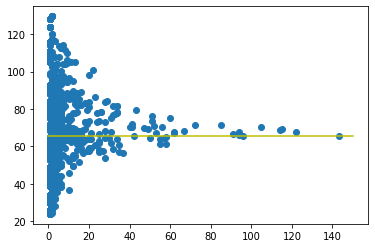

In [6]:
plt.scatter(hashDF.Occurences, hashDF.AvgLikes)
avgL = df.Likes.mean()
x = [0, 150]
y = [avgL,avgL]
plt.plot(x,y, c = 'y')

## Getting the Points 
I chose to get words at which the occurences are between 10 and 80, and the average likes above 70.

In [7]:
hashDF = hashDF.sort_values(by = ['Occurences','AvgLikes'], ascending=False)
bestHash = hashDF[hashDF.Occurences>10][hashDF.Occurences<80][hashDF.AvgLikes>70].sort_values(by = ['AvgLikes'])
bestHash 

C:\Users\noahs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Word,AvgLikes,Occurences
792,ds,70.175000,40
14,rapper,70.414634,41
5,rap,70.571429,56
494,follow,70.961538,52
1,music,71.694444,72
0,musicvideo,71.853659,41
16,musica,72.052632,19
12,youtube,72.892857,28
4,musician,73.083333,24
693,sun,73.111111,18


## Plotting the Best Hashtags 

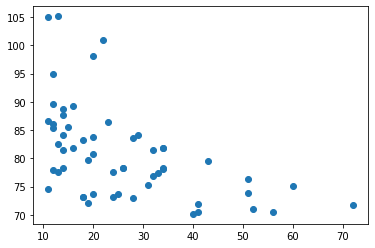

In [8]:
plt.scatter(bestHash.Occurences, bestHash.AvgLikes)

In [9]:
bestWords = []
for i in bestHash.Word:
    bestWords.append(i)

In [10]:
finalHashTags = None
prev = ''
for x in bestWords:
    x = x.replace(" ", "")
    prev = prev+ ", #"+x
print(prev)

, #ds, #rapper, #rap, #follow, #music, #musicvideo, #musica, #youtube, #musician, #sun, #sun, #soundcloud, #unsignedartist, #g, #happy, #life, #spotify, #rapper, #song, #video, #christmas, #rappers, #hiphopartist, #musicvideo, #beats, #beats, #spotify, #hiphopart, #dj, #dance, #production, #trap, #dance, #trap, #beat, #me, #undergroundrap, #rnb, #unsigned, #underground, #rapmusic, #trapmusic, #undergroundrap, #musicislife, #indie, #rapmusic, #songs, #promotion, #songs, #world, #studio, #musicbusiness, #djs, #djs, #newartist, #independentartist


# Conclusion
Displayed about are the best hashtags that I found for my brothers instagram account. I found these words by seeing which word resulted with more AvgLikes than the average amount of likes per photo. THe more times the word occurs while still being above the net average amount of likes, the more likely it is that the hashtag has a positive effect on likes. For example, 

__#dj__
- occurs in 43 photos 
- on average get 79 likes
- The average number of likes for photos is about 70

Thus we can say that it is likely that dj has a positive effect on the amount of likes a picture has. 

Overall this has been a really interesting project learning about web scraping and analyzing trends. The process that I did to attain the "best" hashtags is valuable information but I believe that there is a better way to find the best combination of hashtags to get the most likes possible on a photo. I suspect that there would be even more information to be gained by actually using a machine learning model, in this case a regression neural network. That will be my next project so stay tuned!